<a href="https://colab.research.google.com/github/AlidaNTNU/DSCP-Web-Scraping/blob/main/Final_project_Olympic_swimming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Upload file uploaded = files.upload() # List uploaded files for filename in uploaded.keys(): print(filename)

In [62]:
with open("Olympic_Swimming_Results_1912to2020.csv") as f:
    content = f.read()
    print(content)

﻿Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
Tokyo,2020,100m,Backstroke,0,Men,ESP,Hugo Gonzalez De Oliveira,52.78,4
Tokyo,2020,100m,Backstroke,0,Men,AUS,Mitchell Larkin,52.79,4
Tokyo,2020,100m,Backstroke,0,Men,ROU,Robert Glinta,52.95,4
Tokyo,2020,100m,Breaststroke,0,Men,GBR,Adam Peaty,57.37,1
Tokyo,2020,100m,Breaststroke,0,Men,NED,Arno Kamminga,58,2
Tokyo,2020,100m,Breaststroke,0,Men,ITA,Nicolo Martinenghi,58.33,3
Tokyo,2020,100m,Breaststroke,0,Men,USA,Michael Andrew,58.84,4
Tokyo,2020,100m,Breaststroke,0,Men,GBR,James Wilby,58.96,4
Tokyo,2020,100m,Breaststroke,0,Men,CHN,Zibei Yan,58.99,4
Tokyo,2020,100m,Breaststroke,0,Men,USA,Andrew Wilson,58.99,4
Tokyo,2020,100m,B

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("Olympic_Swimming_Results_1912to2020.csv")

In [65]:
#First I want to check the columns names
df.columns.tolist()

['Location',
 'Year',
 'Distance (in meters)',
 'Stroke',
 'Relay?',
 'Gender',
 'Team',
 'Athlete',
 'Results',
 'Rank']

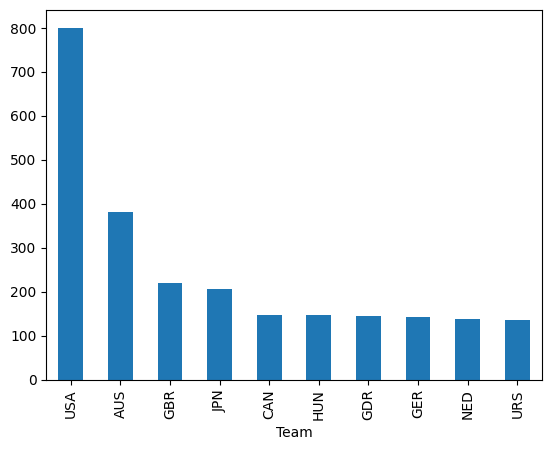

In [66]:
#Secondly, I would like to see the top 10 countries with the most medals.

df['Team'].value_counts()[:10].plot.bar()
plt.show()


In [67]:
#Now I want to know the exact medals per (top 10) country

medal_counts = df.groupby('Team')['Results'].count().reset_index()
medal_counts = medal_counts.rename(columns={'Results': 'Total_Medals'})
medal_counts = medal_counts.sort_values(by='Total_Medals', ascending=False)
print(medal_counts.head(10))

   Team  Total_Medals
75  USA           796
3   AUS           378
27  GBR           220
40  JPN           206
12  CAN           148
33  HUN           146
28  GDR           144
29  GER           142
48  NED           137
73  URS           136


In [68]:
#The colums "Results" contains strings i.g. 00:52:00, and is therefore not numeric. So I first have to convert these strings into seconds by the following code.

import pandas as pd

def time_to_seconds(x):
    if pd.isna(x):
        return None
    x = str(x)
    parts = x.split(":")
    if len(parts) == 1:
        return float(parts[0])                 # "54.12"
    elif len(parts) == 2:
        m, s = parts
        return int(m) * 60 + float(s)          # "1:02.55"
    elif len(parts) == 3:
        h, m, s = parts
        return int(h) * 3600 + int(m)*60 + float(s)
    else:
        return None

In [69]:
#Some of the results show "disqualified"  or "did not start", and can therefore not be converted to seconds. I will eliminate these results by the following code
import pandas as pd

def time_to_seconds(x):
    if pd.isna(x):
        return None

    x = str(x).strip()

    # Skip invalid / non-time results
    if not any(c.isdigit() for c in x):
        return None

    # Now try to parse
    parts = x.split(":")
    try:
        if len(parts) == 1:
            return float(parts[0])                 # "54.12"
        elif len(parts) == 2:
            m, s = parts
            return int(m) * 60 + float(s)          # "1:02.55"
        elif len(parts) == 3:
            h, m, s = parts
            return int(h)*3600 + int(m)*60 + float(s)
        else:
            return None
    except:
        return None


In [70]:
#Now I would like to see the average time for each stroke

df['Results'] = pd.to_numeric(df['Results'], errors='coerce')

df_clean = df.dropna(subset=['Results'])
average_times = df_clean.groupby('Stroke')['Results'].mean().reset_index()
average_times = average_times.rename(columns={'Results': 'Average_Time'})

average_times = average_times.sort_values(by='Average_Time')

print(average_times)

         Stroke  Average_Time
3     Freestyle     43.123472
2     Butterfly     55.032370
0    Backstroke     55.983759
1  Breaststroke     59.084828


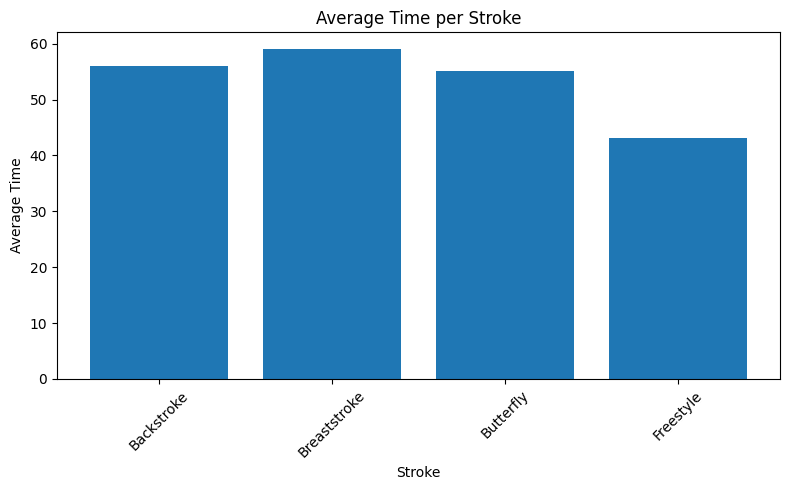

In [71]:
#After finding out the average time, I want to put them next to eachother in a graph.

df['Results'] = pd.to_numeric(df['Results'], errors='coerce')

df_clean = df.dropna(subset=['Results'])

avg_times = df_clean.groupby('Stroke')['Results'].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_times.index, avg_times.values)
plt.xlabel("Stroke")
plt.ylabel("Average Time")
plt.title("Average Time per Stroke")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()